## Machine Learning - Desafío 5, Máquinas de Soporte Vectorial
#### Gustavo Morales, G10 - 20.Ene.2020, (Lunes Semana 3)

### **Ejercicio 1: Preparar el ambiente de trabajo**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import rcParams
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
plt.rcParams['figure.figsize'] = (16, 10)
plt.style.use('seaborn')

df = pd.read_csv('breast_cancer.csv').drop(columns = ['id', 'Unnamed: 32'])

In [3]:
df.sample(5, random_state=42)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,B,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,M,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,M,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,B,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,B,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [5]:
df.isnull().sum(axis = 0);  # NaN distribution columnwise

In [6]:
le = LabelEncoder()
le.fit(df['diagnosis'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'B': 0, 'M': 1}


In [7]:
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [8]:
df.sample(5, random_state=421)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
365,1,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,...,24.31,26.37,161.20,1780.0,0.1327,0.2376,0.2702,0.17650,0.2609,0.06735
119,1,17.95,20.01,114.20,982.0,0.08402,0.06722,0.07293,0.05596,0.2129,...,20.58,27.83,129.20,1261.0,0.1072,0.1202,0.2249,0.11850,0.4882,0.06111
200,0,12.23,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,0.1979,...,14.44,28.36,92.15,638.4,0.1429,0.2042,0.1377,0.10800,0.2668,0.08174
447,0,14.80,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.02260,0.1893,...,16.43,22.74,105.90,829.5,0.1226,0.1881,0.2060,0.08308,0.3600,0.07285
506,0,12.22,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.02166,0.2124,...,13.16,24.17,85.13,515.3,0.1402,0.2315,0.3535,0.08088,0.2709,0.08839


### **Ejercicio 2: Visualizando la distribución de los atributos**

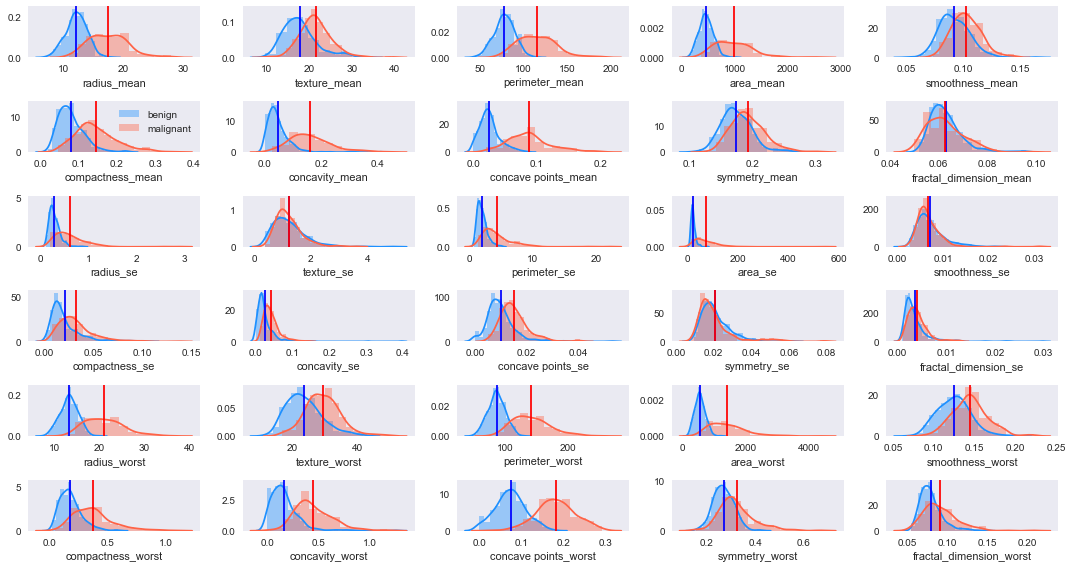

In [9]:
plt.rcParams['figure.figsize'] = 15, 8
obj = 'diagnosis'
for i, var in enumerate(df.columns.tolist()[1:]):
    plt.subplot(6,5,i+1)
    plt.grid(None)
    sns.distplot(df[df[obj] == 0][var], label='benign', color='dodgerblue')
    sns.distplot(df[df[obj] == 1][var], label='malignant', color='tomato')
    plt.axvline(df[df[obj] == 0][var].mean(), color='blue')
    plt.axvline(df[df[obj] == 1][var].mean(), color='red')
    if i==5:
        plt.legend()
    plt.tight_layout()
plt.tight_layout()

**(R)** Los atributos con una mayor similitud en la distribución son:
- `texture_mean`, `smoothness_mean`, `symmetry_mean`, `fractal_dimension_mean`;
- `texture_se`, `smoothness_se`, `symmetry_se`, `concave_points_se`, `fractal_dimension_se`;
- `texture_worst`, `smoothness_worst`, `symmetry_worst`, `concave_points_worst`

### **Ejercicio 3: Estimando el porcentaje de overlap en los atributos**

In [10]:
def histogram_overlap(dataframe, attribute, target, perc = 100):
    # get lower bound
    empirical_lower_bound = np.floor(dataframe[attribute].min())
    # get upper bound
    empirical_upper_bound = np.ceil(dataframe[attribute].max())
    # preserve histograms
    tmp_hist_holder = dict()
    # for each target class
    for unique_value in np.unique(dataframe[target]):
        # get histogram
        tmp, _ = np.histogram(
            # for a specific attribute
            dataframe[dataframe[target] == unique_value][attribute],
            # define percentage
            bins = perc,
            # limit empirical range for comparison
            range = [empirical_lower_bound, empirical_upper_bound]    
        )
        # append to dict
        tmp_hist_holder["h_"+str(unique_value)] = tmp
        
    get_minima = np.minimum(tmp_hist_holder['h_0'], tmp_hist_holder['h_1'])
    intersection = np.true_divide(np.sum(get_minima),np.sum(tmp_hist_holder['h_1']))
        
    return intersection

In [11]:
cols = df.columns.tolist()[1:]
commonality_list = []

for var in cols:
    commonality_list.append(histogram_overlap(df, var, obj))
    
df_common = pd.DataFrame({'attribute': cols, 'commonality': commonality_list})

In [12]:
df_common.sort_values('commonality', ascending = False)

,attribute,commonality
19,fractal_dimension_se,1.000000
14,smoothness_se,0.995283
9,fractal_dimension_mean,0.990566
18,symmetry_se,0.957547
11,texture_se,0.924528
15,compactness_se,0.882075
4,smoothness_mean,0.877358
8,symmetry_mean,0.858491
17,concave points_se,0.853774
29,fractal_dimension_worst,0.830189


### **Ejercicio 4: Selección del modelo por GridSearchCV**

In [13]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
X_s = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=.33, random_state=421)

In [14]:
params = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
}
CV = 10

In [15]:
svc_model = GridSearchCV(SVC(kernel='rbf'), params, cv=CV, return_train_score=True)
svc_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [16]:
scores = svc_model.cv_results_['mean_test_score']
data = scores.reshape(len(params['C']),len(params['gamma']))

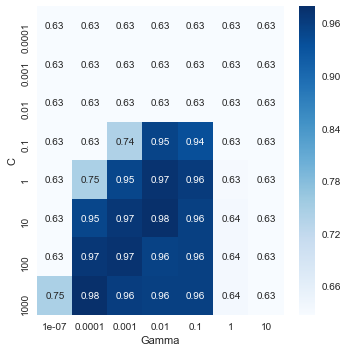

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(data, cmap='Blues', annot=True, fmt='.2',
            xticklabels=params['gamma'],
            yticklabels=params['C'])
plt.xlabel('Gamma')
plt.ylabel('C')
plt.tight_layout()

**(R)** Rango de cada hiperparámetro en donde el modelo es más eficiente:

$0.0001 < \mathrm{gamma} < 0.1$

$0.1 < \mathrm{C} < 1000$

Y la mejor combinación está dada por:

In [18]:
print(svc_model.best_params_)

{'C': 10, 'gamma': 0.01}


### **Ejercicio 5: Validación del modelo en el hold-out sample**

Primero obtengo el mejor modelo:

In [19]:
X_train_ho, X_test_ho, y_train_ho, y_test_ho = train_test_split(X_test, y_test, test_size=.33, random_state=42)
svc_best = svc_model.best_estimator_.fit(X_train_ho, y_train_ho)

Y ahora comparo sus rendimientos:

In [20]:
print(classification_report(y_test, svc_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       118
           1       1.00      0.94      0.97        70

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



In [21]:
print(classification_report(y_test_ho, svc_best.predict(X_test_ho)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.89      0.94        19

    accuracy                           0.97        63
   macro avg       0.98      0.95      0.96        63
weighted avg       0.97      0.97      0.97        63



### **Ejercicio (opcional): Depuración de atributos**

In [22]:
df_common.sort_values('commonality', ascending=True).head(11)

,attribute,commonality
22,perimeter_worst,0.216981
23,area_worst,0.216981
20,radius_worst,0.226415
7,concave points_mean,0.231132
27,concave points_worst,0.235849
2,perimeter_mean,0.283019
3,area_mean,0.301887
6,concavity_mean,0.306604
0,radius_mean,0.311321
13,area_se,0.349057
